In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.models import Sequential
from keras.layers import InputLayer,Dense 
from keras.optimizers import SGD
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [173]:
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\mushrooms.csv")

In [5]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
df["cap-shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [18]:
df["cap-shape"].duplicated().sum()

8118

Frequency Counts for column 'class':
e    4208
p    3916
Name: class, dtype: int64



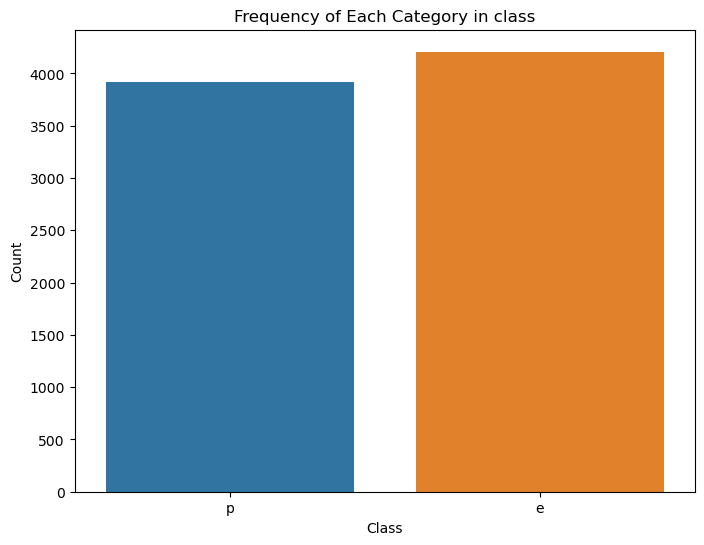

Frequency Counts for column 'cap-shape':
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64



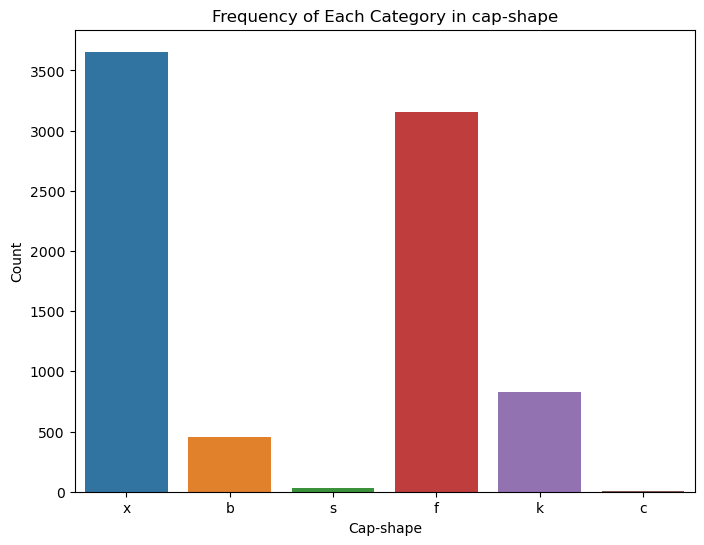

Frequency Counts for column 'cap-surface':
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64



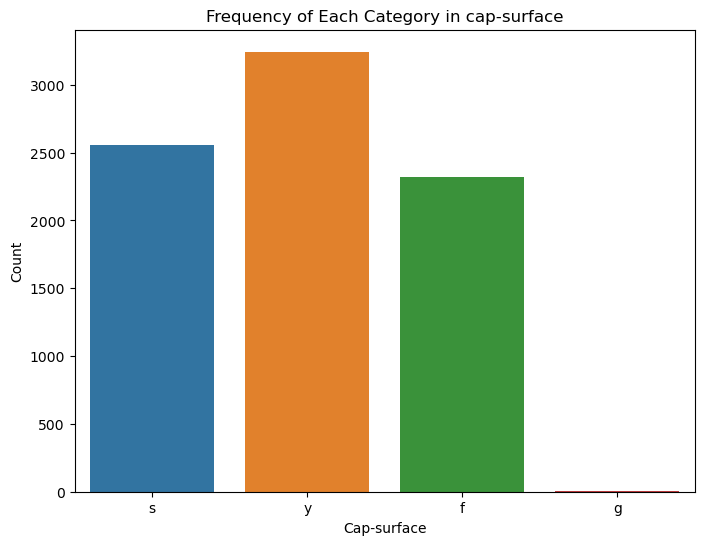

Frequency Counts for column 'cap-color':
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64



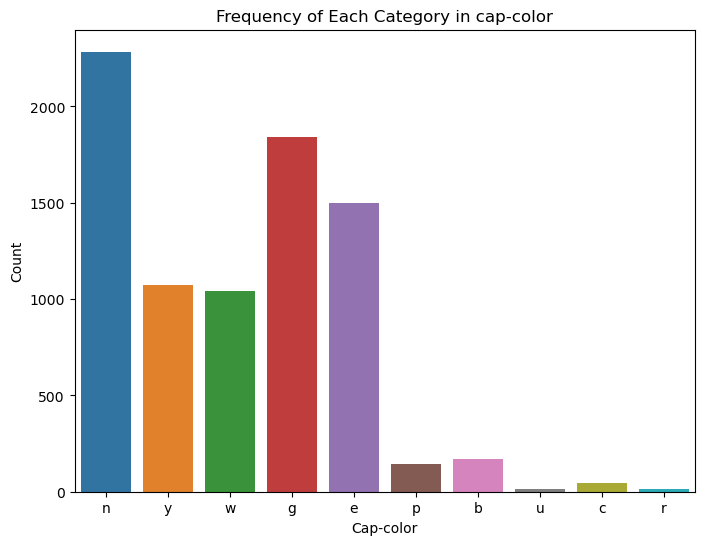

Frequency Counts for column 'bruises':
f    4748
t    3376
Name: bruises, dtype: int64



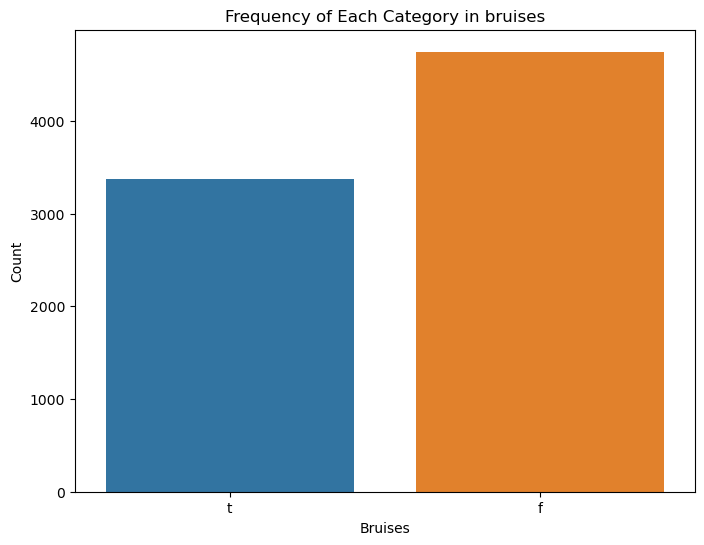

Frequency Counts for column 'odor':
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64



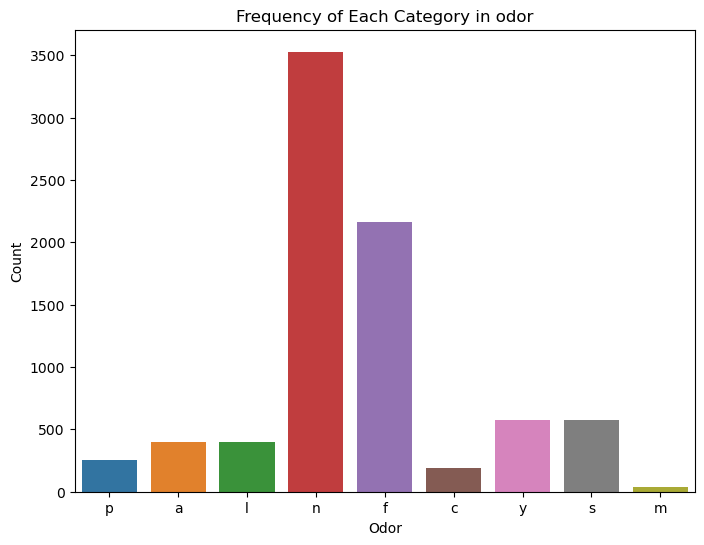

Frequency Counts for column 'gill-attachment':
f    7914
a     210
Name: gill-attachment, dtype: int64



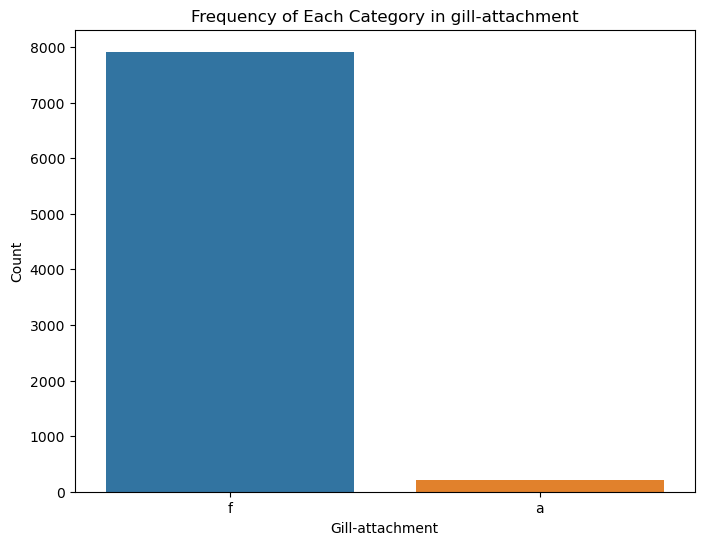

Frequency Counts for column 'gill-spacing':
c    6812
w    1312
Name: gill-spacing, dtype: int64



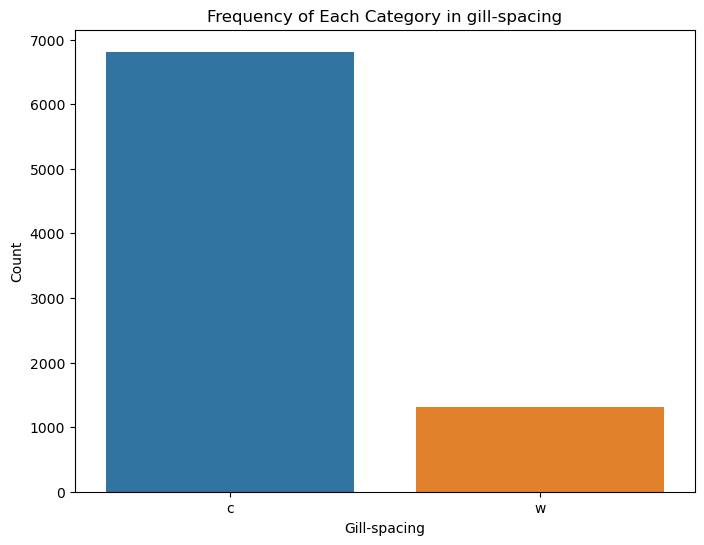

Frequency Counts for column 'gill-size':
b    5612
n    2512
Name: gill-size, dtype: int64



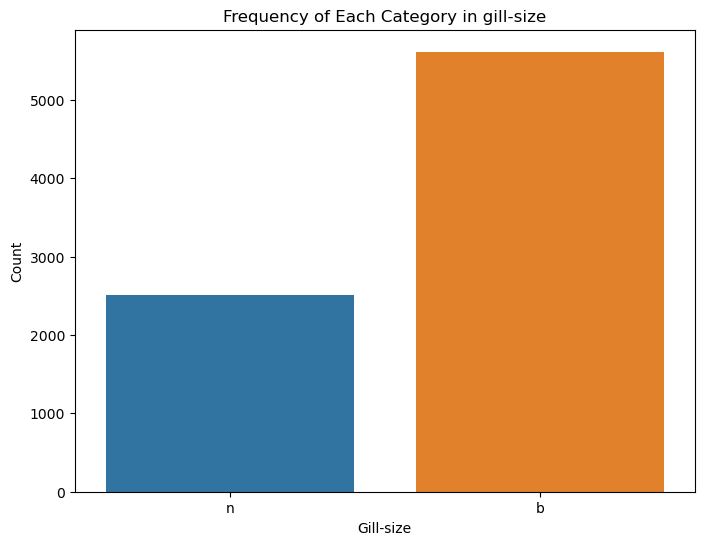

Frequency Counts for column 'gill-color':
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64



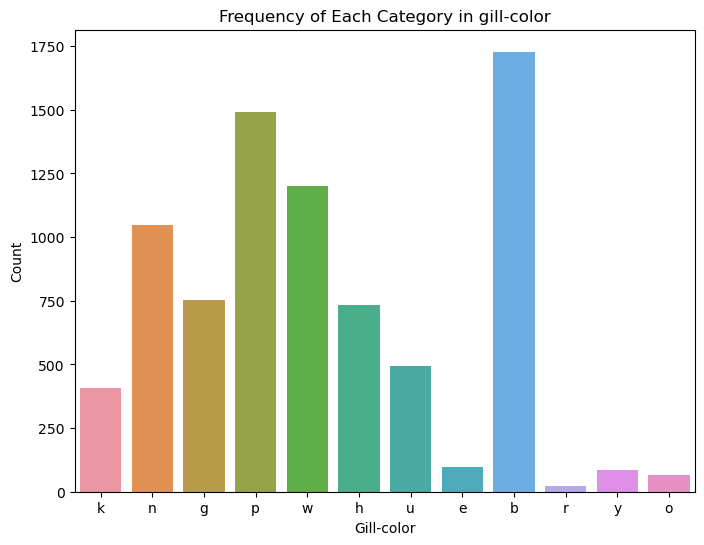

Frequency Counts for column 'stalk-shape':
t    4608
e    3516
Name: stalk-shape, dtype: int64



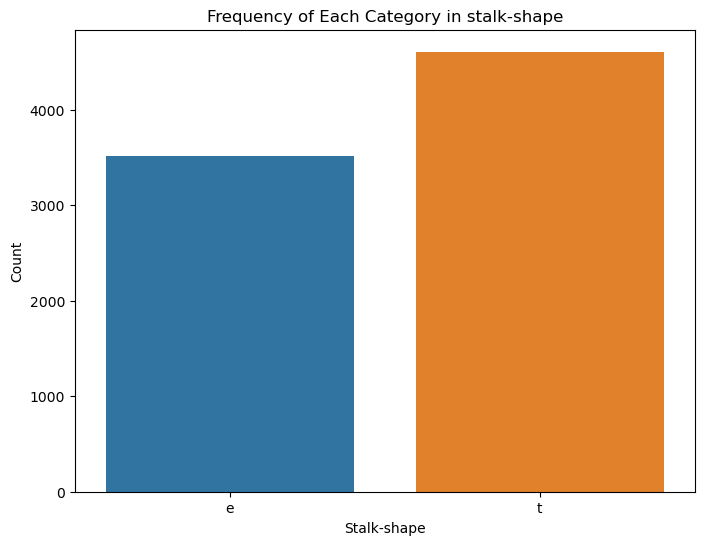

Frequency Counts for column 'stalk-root':
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64



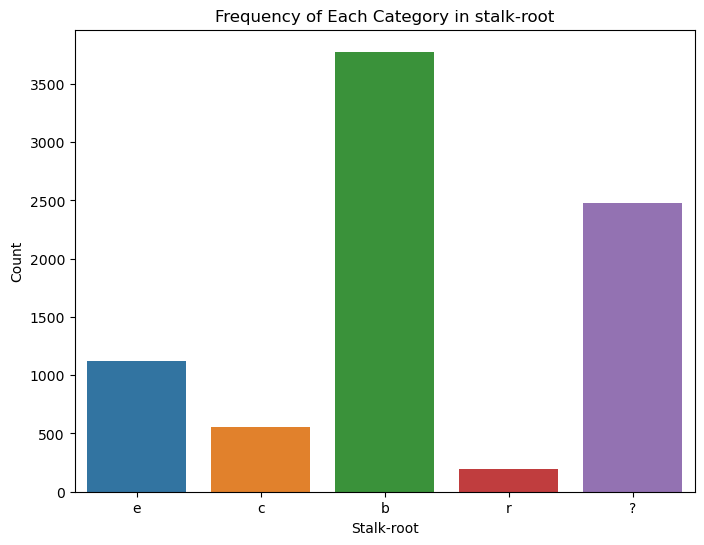

Frequency Counts for column 'stalk-surface-above-ring':
s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64



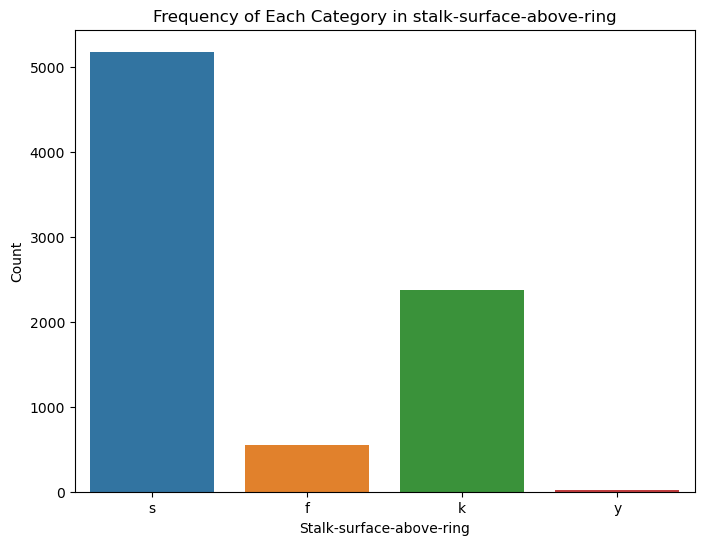

Frequency Counts for column 'stalk-surface-below-ring':
s    4936
k    2304
f     600
y     284
Name: stalk-surface-below-ring, dtype: int64



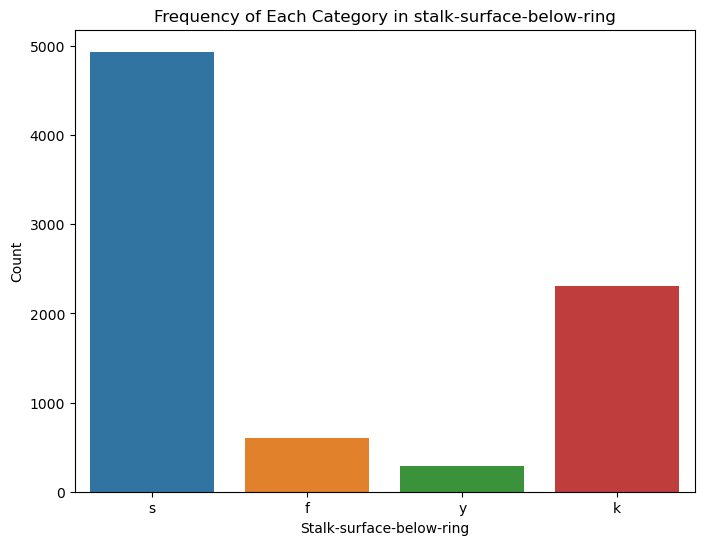

Frequency Counts for column 'stalk-color-above-ring':
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: stalk-color-above-ring, dtype: int64



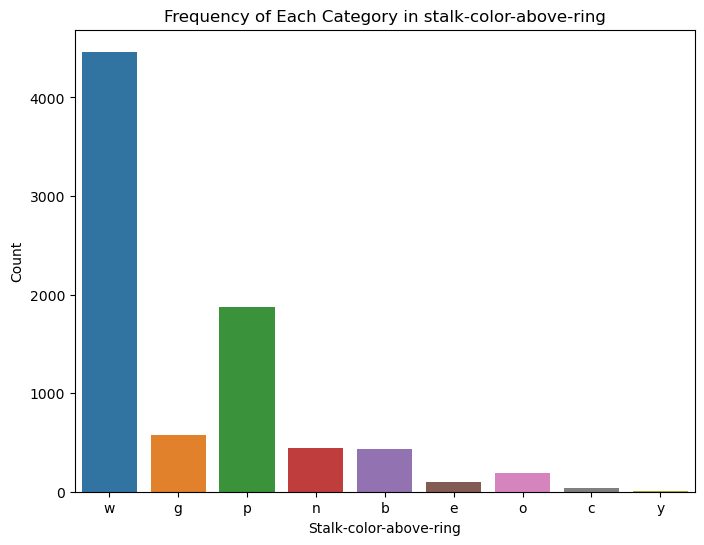

Frequency Counts for column 'stalk-color-below-ring':
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: stalk-color-below-ring, dtype: int64



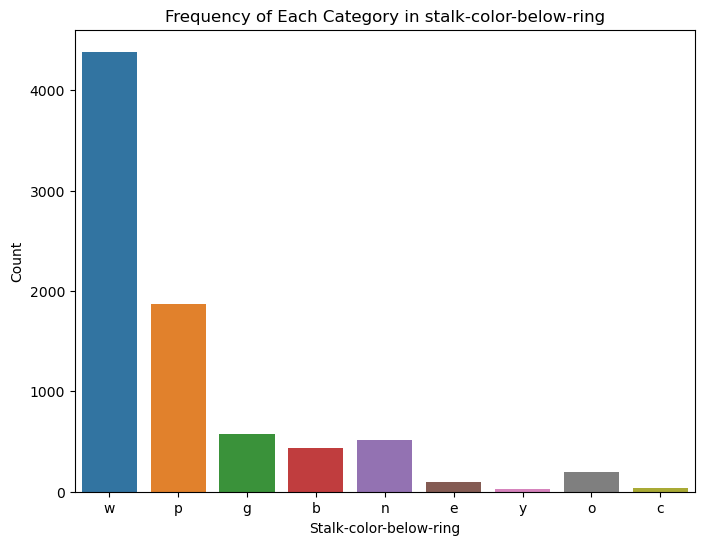

Frequency Counts for column 'veil-type':
p    8124
Name: veil-type, dtype: int64



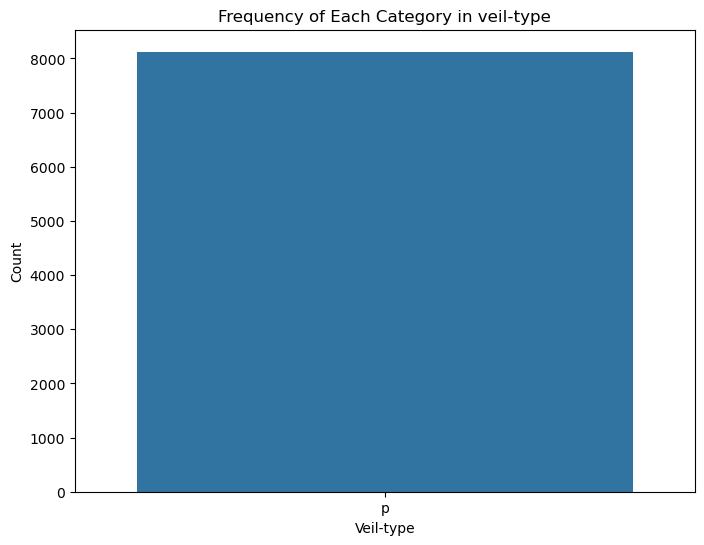

Frequency Counts for column 'veil-color':
w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64



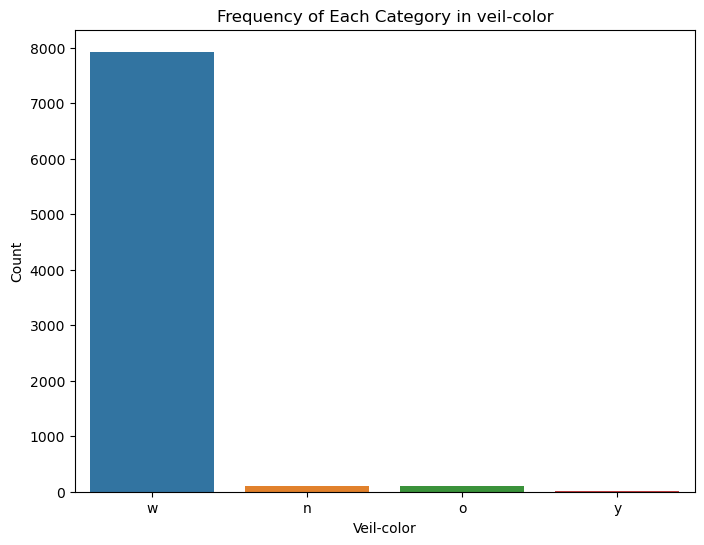

Frequency Counts for column 'ring-number':
o    7488
t     600
n      36
Name: ring-number, dtype: int64



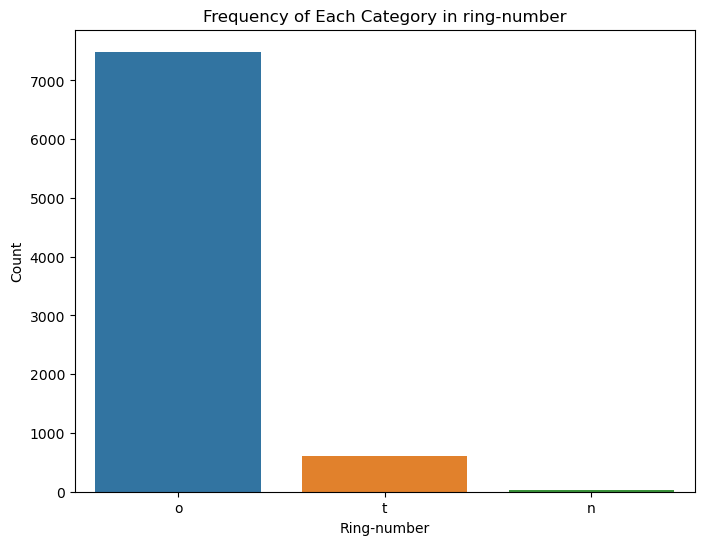

Frequency Counts for column 'ring-type':
p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64



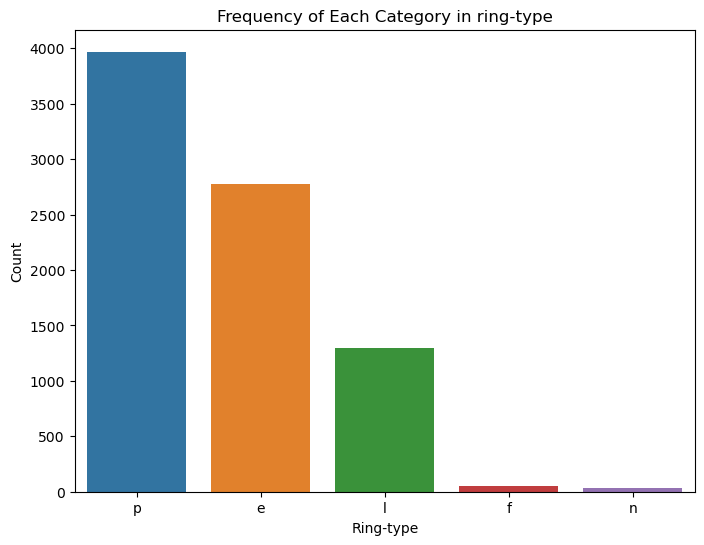

Frequency Counts for column 'spore-print-color':
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: spore-print-color, dtype: int64



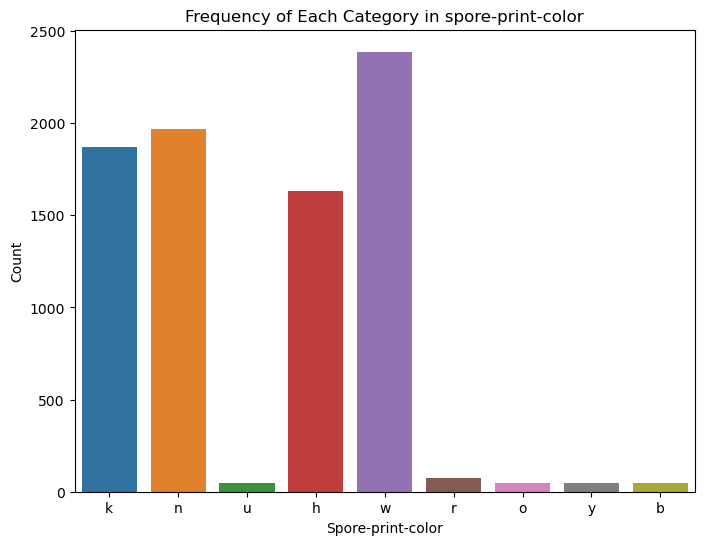

Frequency Counts for column 'population':
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64



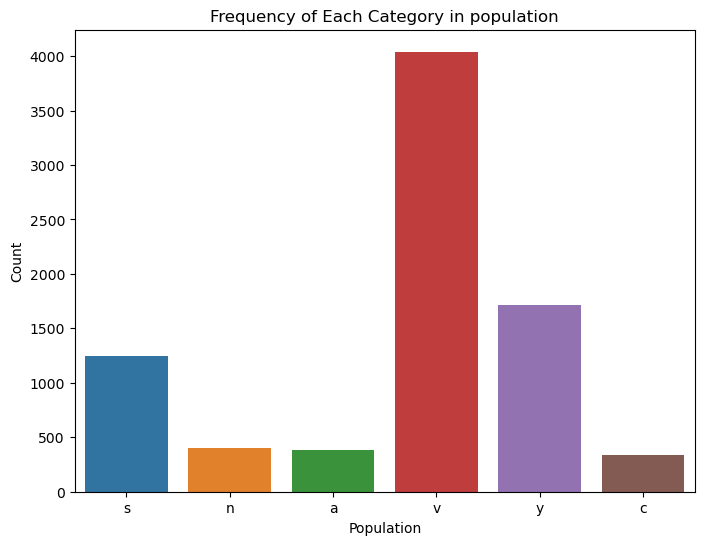

Frequency Counts for column 'habitat':
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64



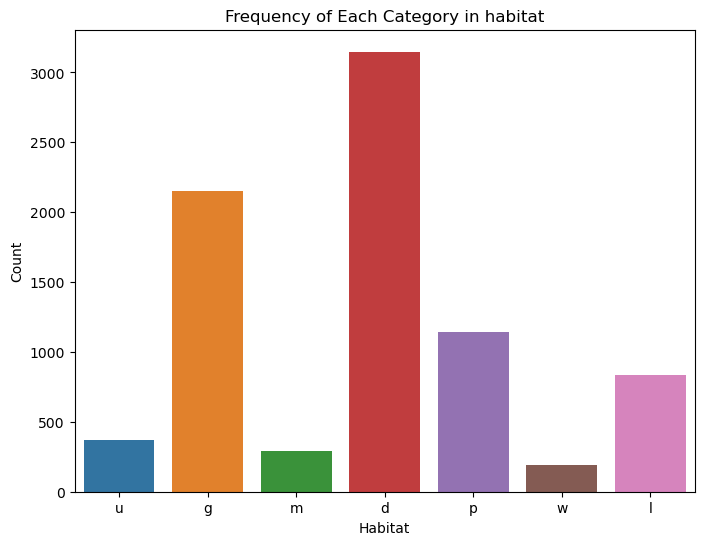

In [26]:
def eda_nominal_data(df):
    for col in df.columns:
        
        val_counts = df[col].value_counts()

        
        print(f"Frequency Counts for column '{col}':\n{val_counts}\n")
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df)
        plt.title(f'Frequency of Each Category in {col}')
        plt.xlabel(col.capitalize())
        plt.ylabel('Count')
        plt.show()

        
eda_nominal_data(df)

In [32]:
def groupby_class_value_counts(df, class_col='class'):
    for col in df.columns:
        if col != class_col:
            value_counts = df.groupby(class_col)[col].value_counts()
            print(f"Value counts for column '{col}' grouped by '{class_col}':\n{value_counts}\n")
            
groupby_class_value_counts(df,class_col="class")

Value counts for column 'cap-shape' grouped by 'class':
class  cap-shape
e      x            1948
       f            1596
       b             404
       k             228
       s              32
p      x            1708
       f            1556
       k             600
       b              48
       c               4
Name: cap-shape, dtype: int64

Value counts for column 'cap-surface' grouped by 'class':
class  cap-surface
e      f              1560
       y              1504
       s              1144
p      y              1740
       s              1412
       f               760
       g                 4
Name: cap-surface, dtype: int64

Value counts for column 'cap-color' grouped by 'class':
class  cap-color
e      n            1264
       g            1032
       w             720
       e             624
       y             400
       p              56
       b              48
       c              32
       r              16
       u              16
p      n            1020

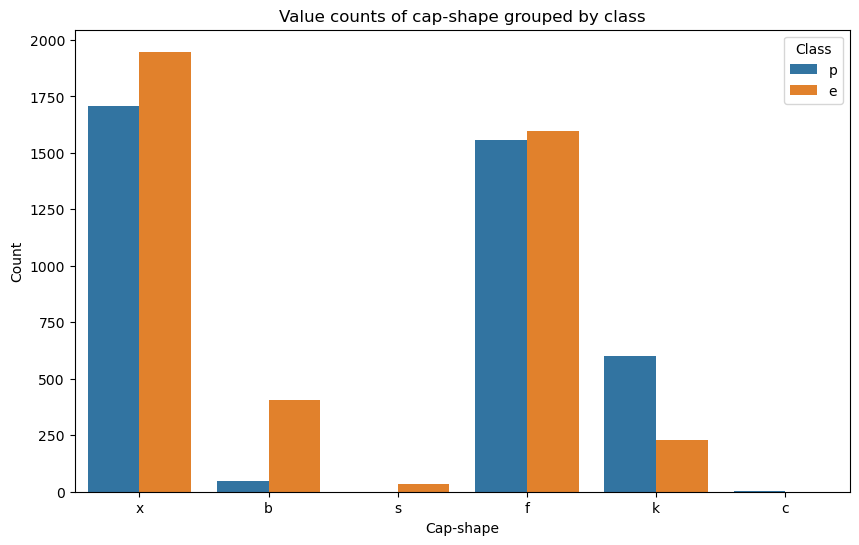

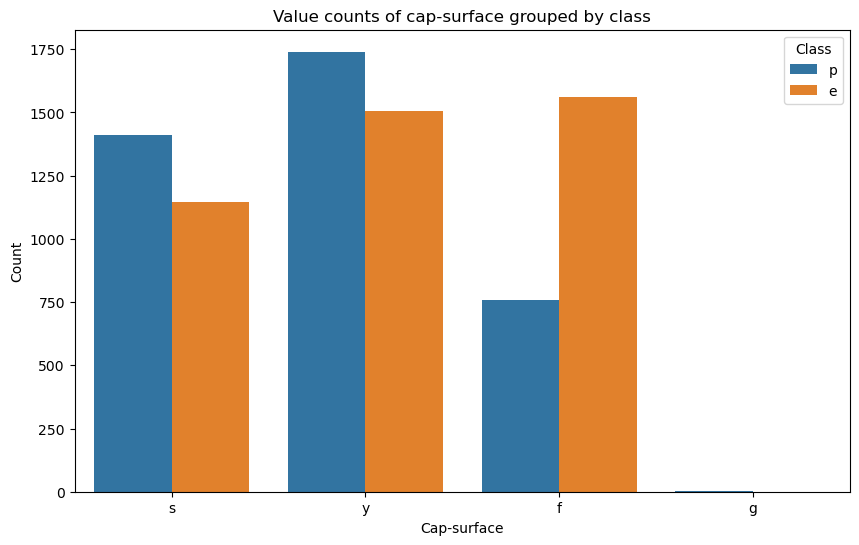

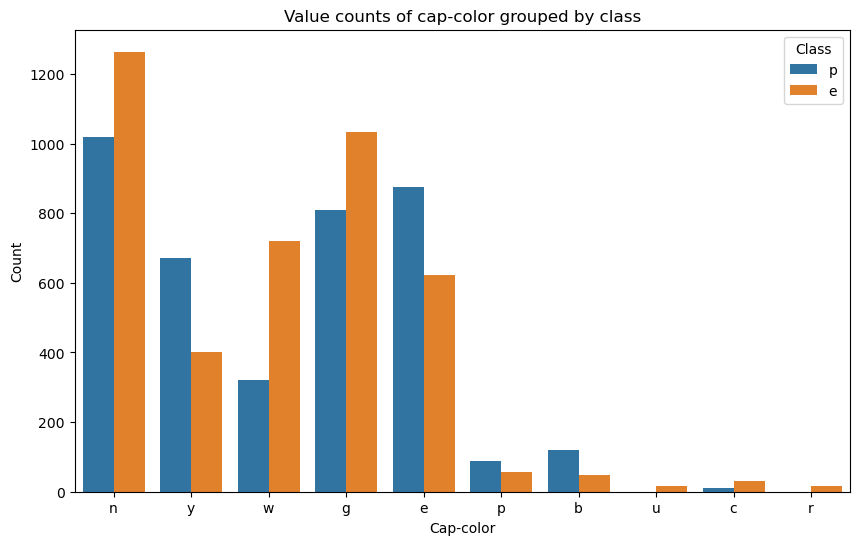

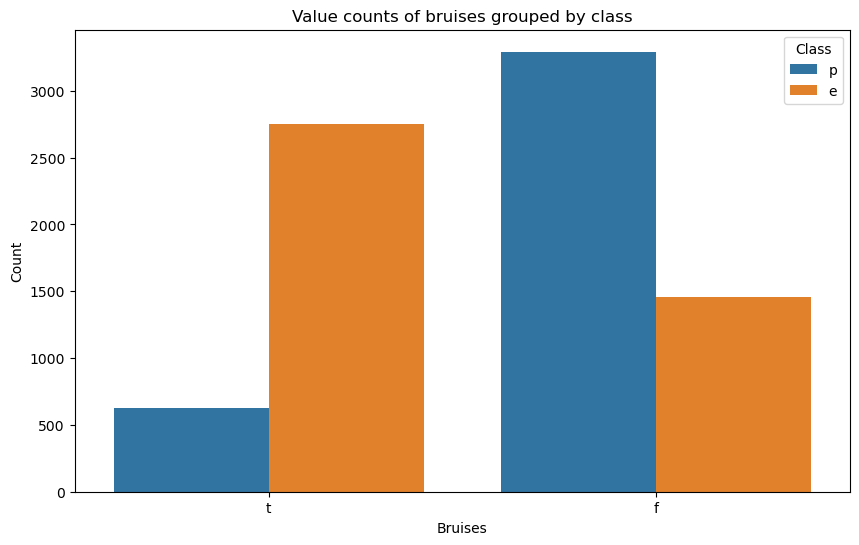

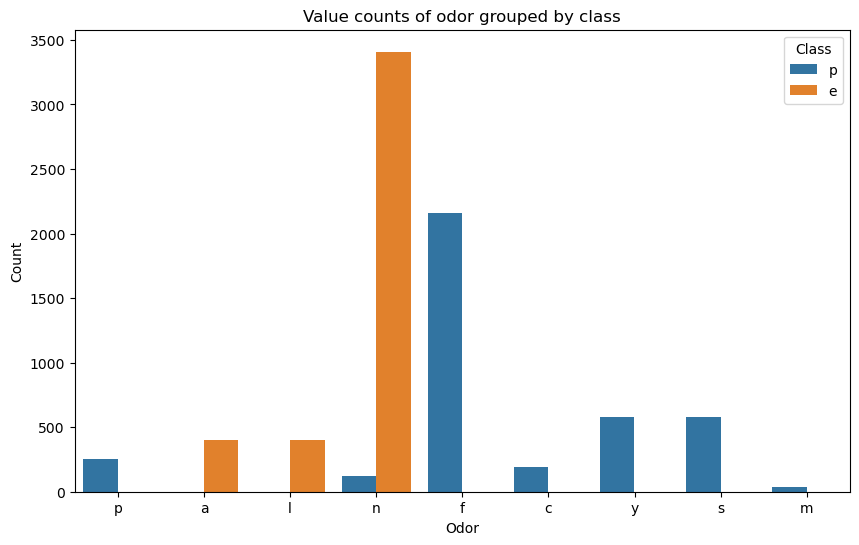

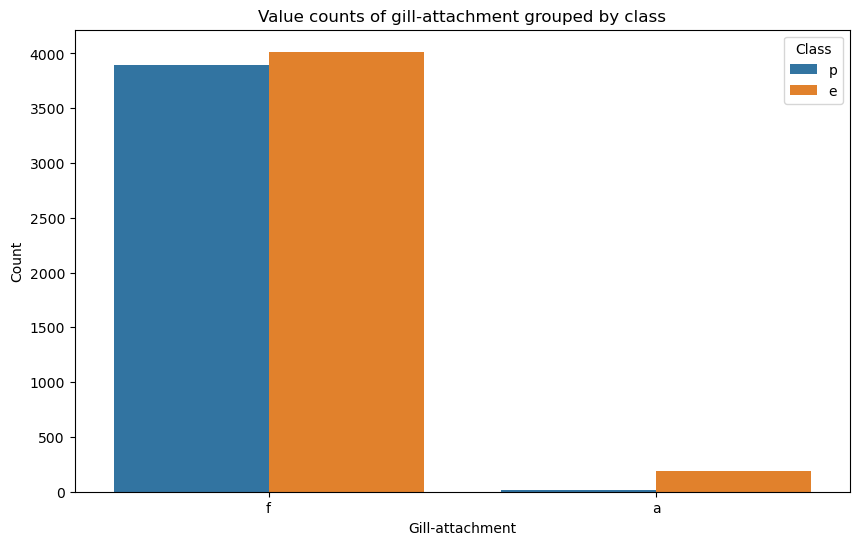

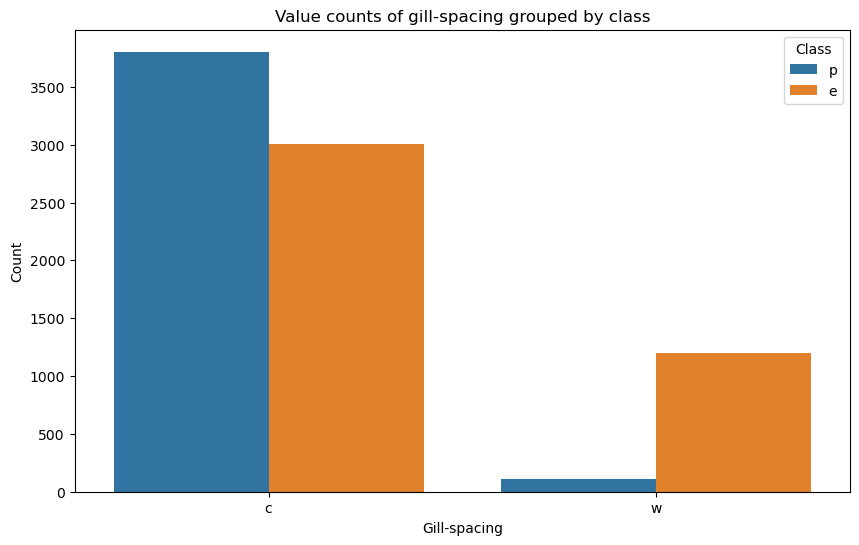

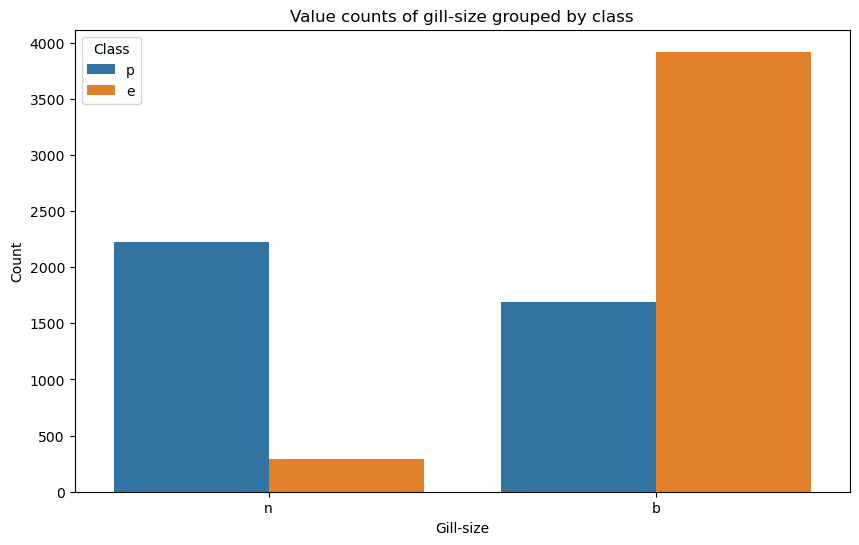

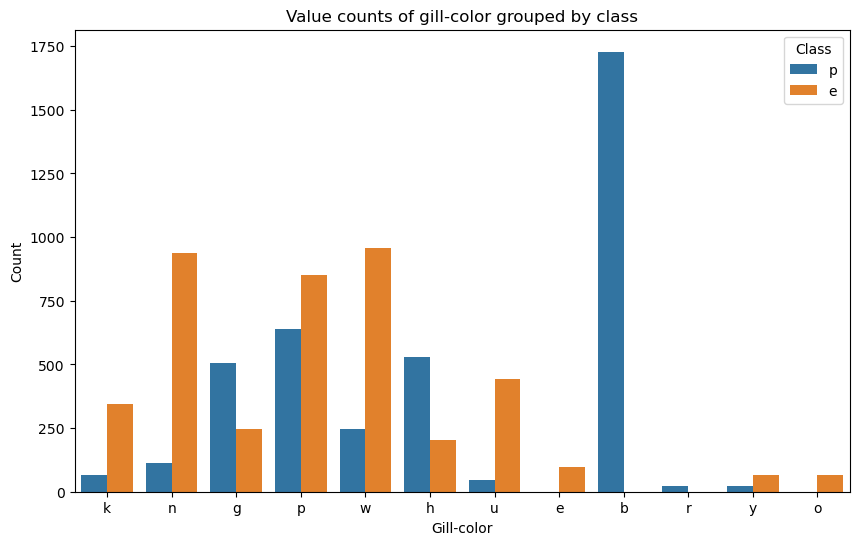

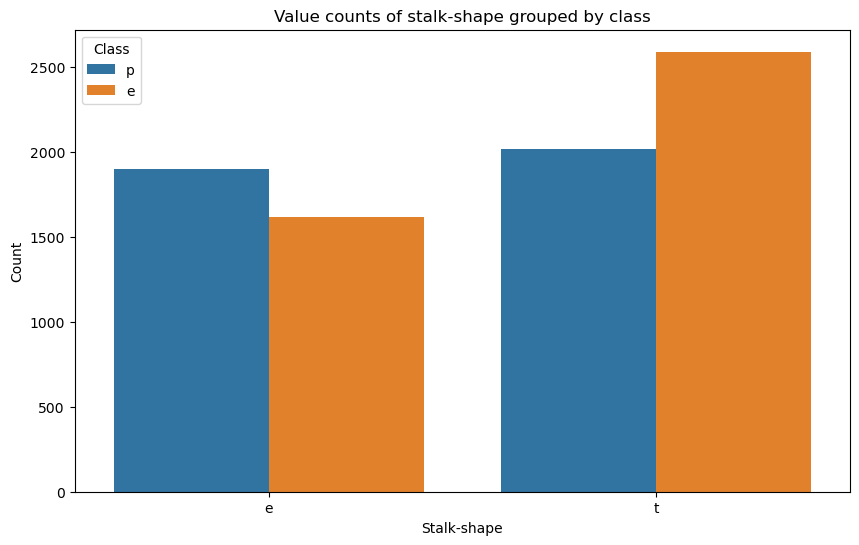

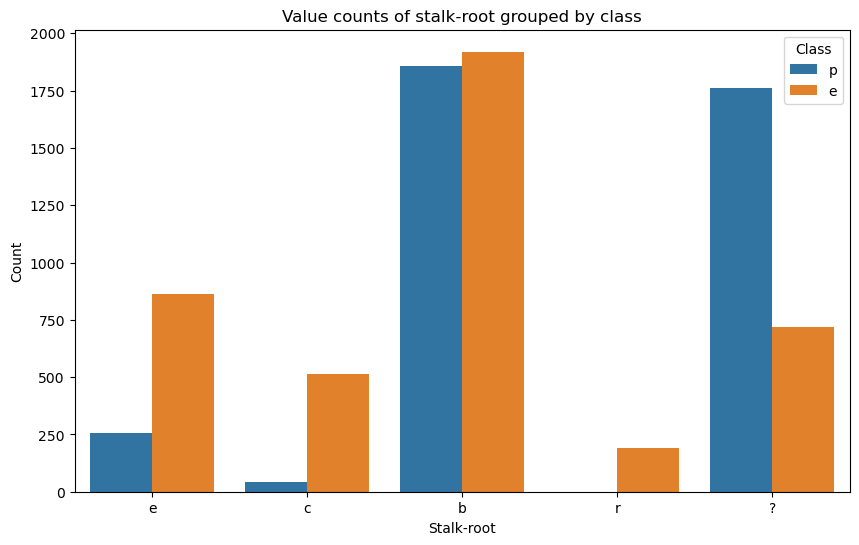

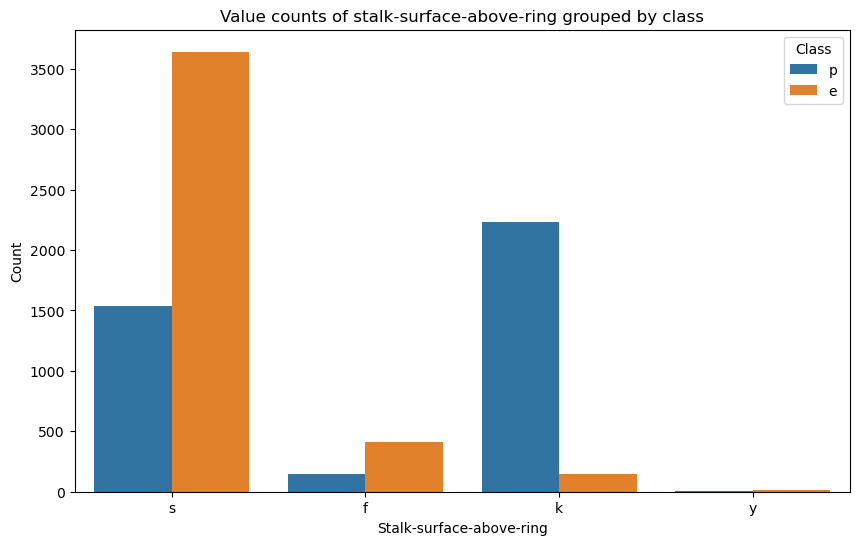

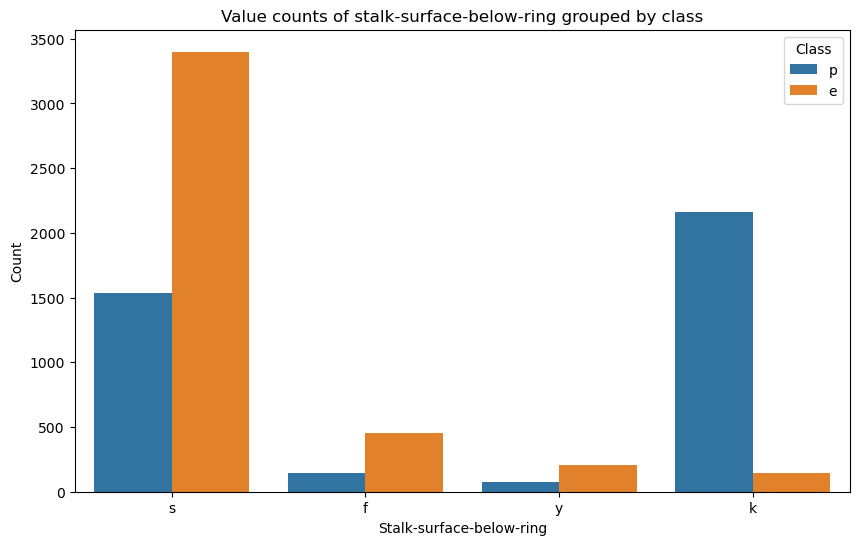

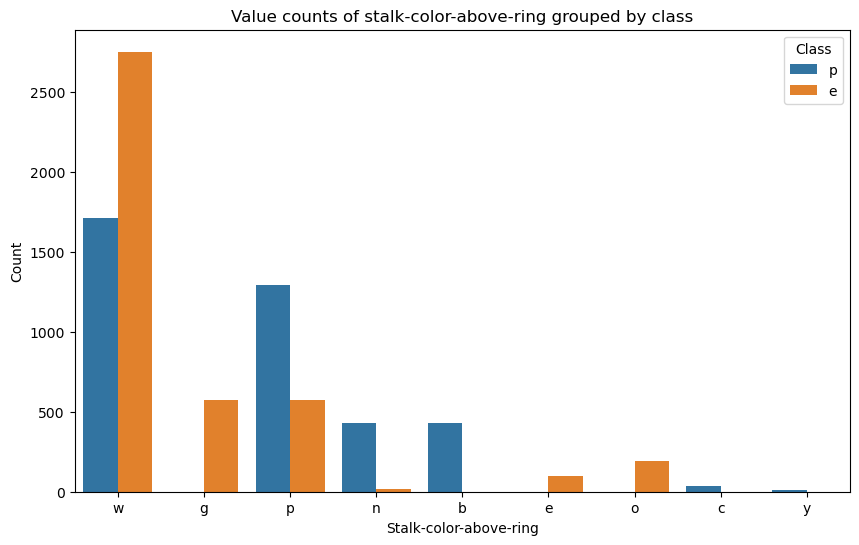

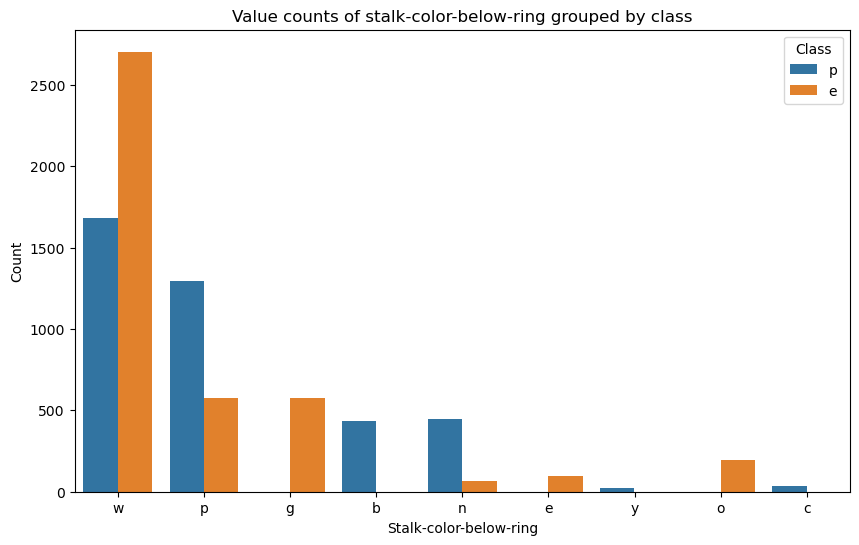

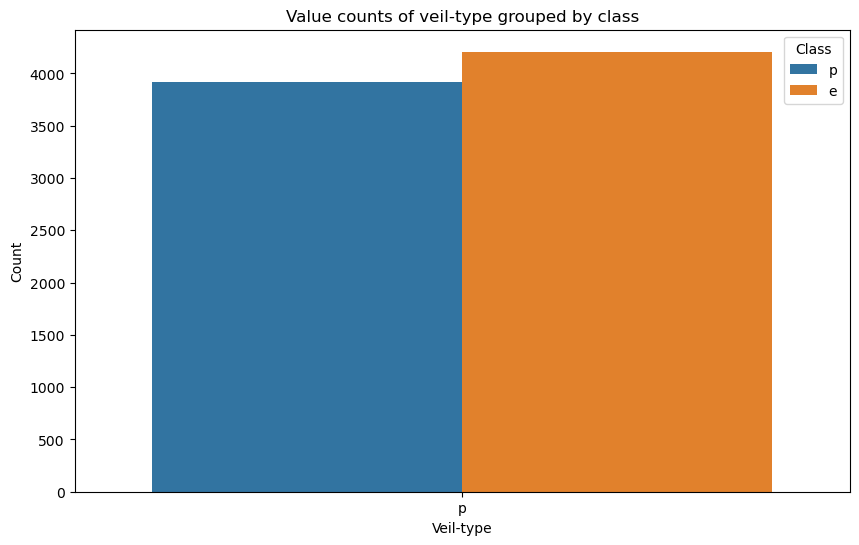

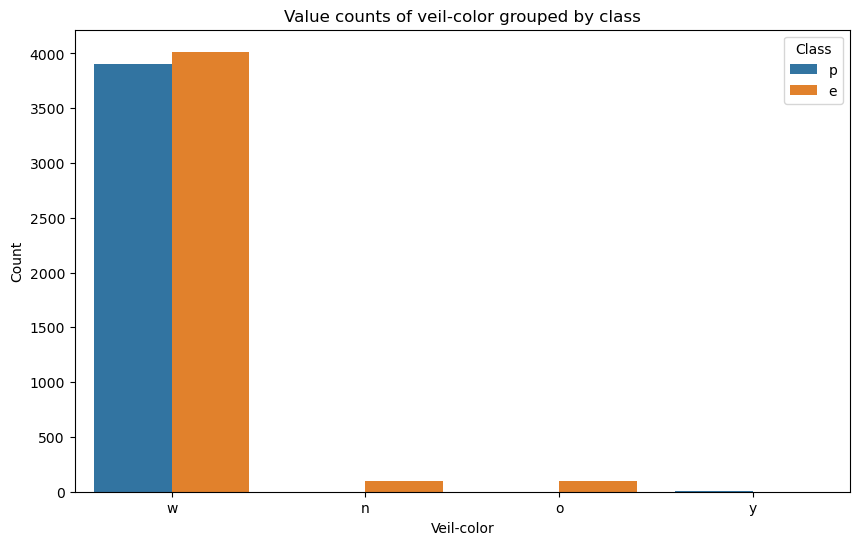

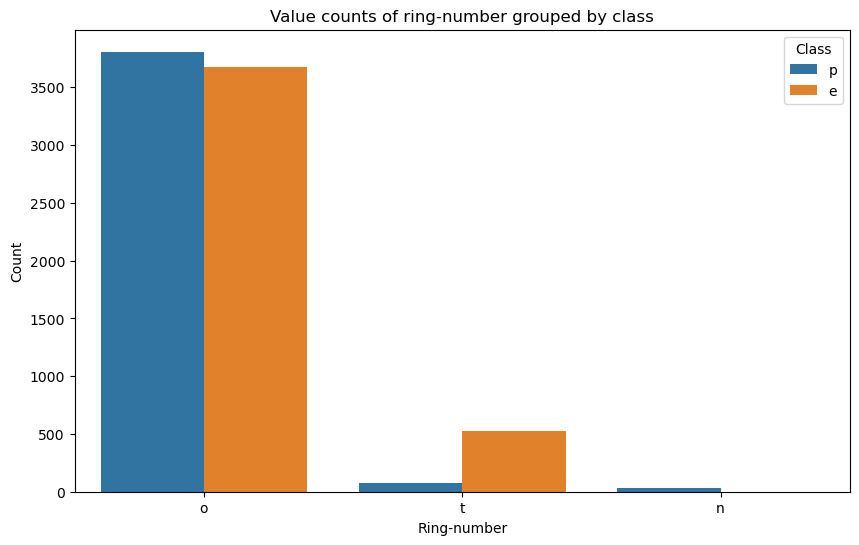

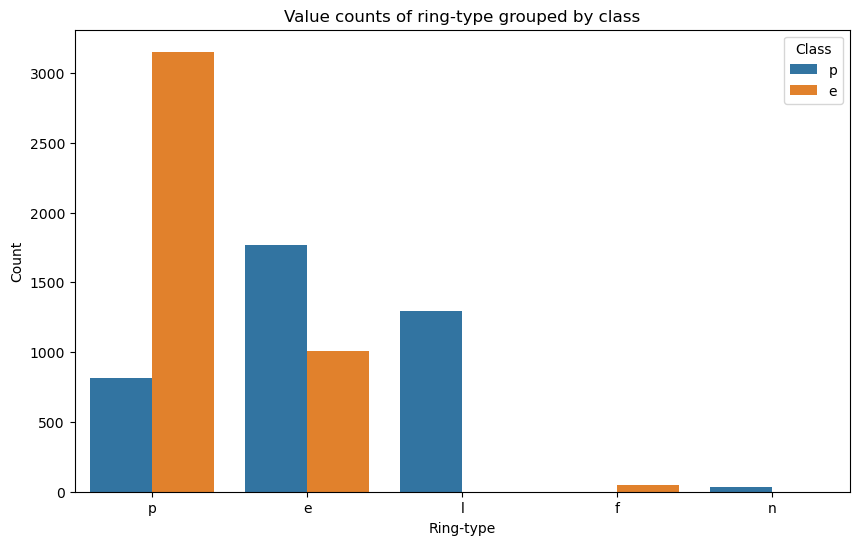

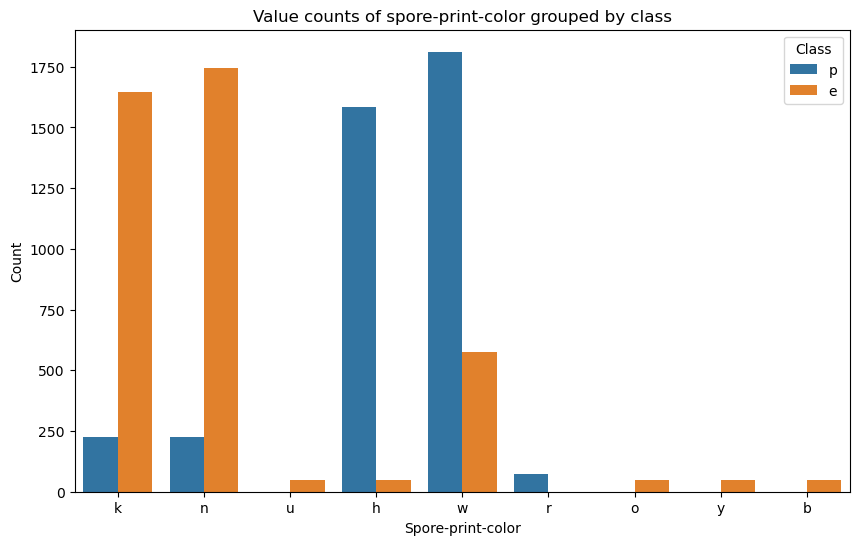

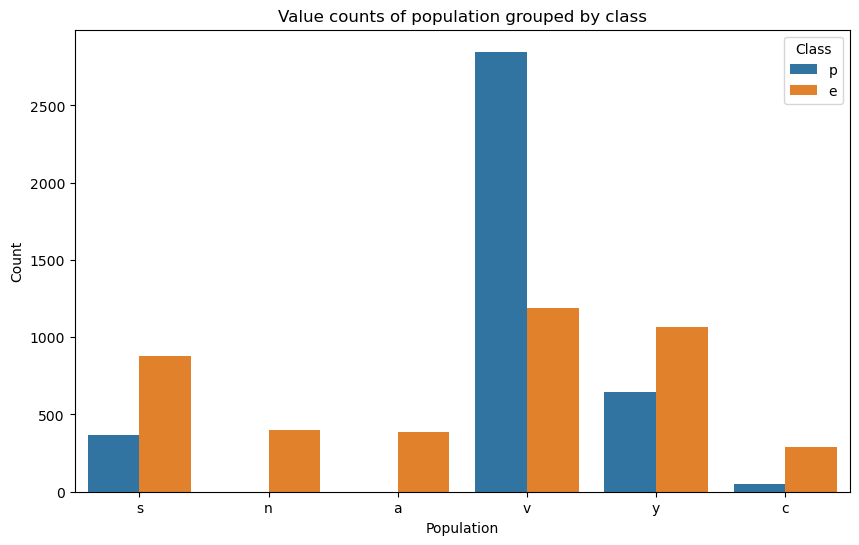

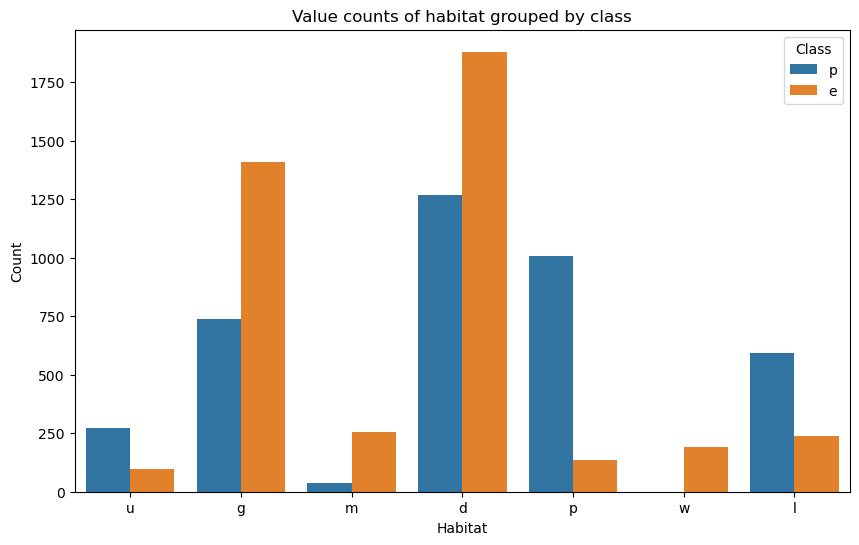

In [37]:
for col in df.columns:
    if col != "class":
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue="class", data=df)
        plt.title(f'Value counts of {col} grouped by class')
        plt.xlabel(col.capitalize())
        plt.ylabel('Count')
        plt.legend(title="Class")
        plt.show()

In [174]:
df["class"]

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [175]:
df["class"].unique()

array(['p', 'e'], dtype=object)

In [176]:
df["class"] = df["class"].map({'p':0,'e':1})

In [177]:
cv = df["class"]
fv = df.drop("class",axis=1)
cv

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

In [178]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size=0.2,random_state=7)

In [179]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first')

In [180]:
x_train = ohe.fit_transform(x_train)
x_test = ohe.transform(x_test)

In [181]:
x_train.shape

(6499, 95)

In [182]:
x_test.shape

(1625, 95)

In [190]:
model = Sequential()
model.add(InputLayer(shape=(95,)))
model.add(Dense(units=4,activation="sigmoid"))
model.add(Dense(units=6,activation="sigmoid"))
model.add(Dense(units=1,activation="sigmoid")) 

In [191]:
sgd = SGD(learning_rate=0.001)

In [192]:
model.compile(optimizer=sgd,loss="binary_crossentropy",metrics=["accuracy","f1_score"])

In [193]:
history = model.fit(x_train,y_train,batch_size=15,epochs=150,validation_split=0.2)

Epoch 1/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4864 - f1_score: 0.6897 - loss: 0.6937 - val_accuracy: 0.5192 - val_f1_score: 0.6961 - val_loss: 0.6928
Epoch 2/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4999 - f1_score: 0.6783 - loss: 0.6930 - val_accuracy: 0.5154 - val_f1_score: 0.6961 - val_loss: 0.6922
Epoch 3/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5027 - f1_score: 0.6844 - loss: 0.6926 - val_accuracy: 0.5185 - val_f1_score: 0.6961 - val_loss: 0.6917
Epoch 4/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5113 - f1_score: 0.6806 - loss: 0.6921 - val_accuracy: 0.5285 - val_f1_score: 0.6961 - val_loss: 0.6913
Epoch 5/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5111 - f1_score: 0.6775 - loss: 0.6921 - val_accuracy: 0.5338 - val_f1_score: 0.6961 - val_loss: 0.6909
Epoch 6/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5130 - f1_score: 0.6812 - loss: 0.6917 - val_accuracy: 0.5315 - val_f1_score: 

Epoch 41/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6095 - f1_score: 0.6895 - loss: 0.6796 - val_accuracy: 0.6585 - val_f1_score: 0.6961 - val_loss: 0.6784
Epoch 42/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6247 - f1_score: 0.6837 - loss: 0.6796 - val_accuracy: 0.6677 - val_f1_score: 0.6961 - val_loss: 0.6779
Epoch 43/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6572 - f1_score: 0.6795 - loss: 0.6792 - val_accuracy: 0.6738 - val_f1_score: 0.6961 - val_loss: 0.6774
Epoch 44/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6499 - f1_score: 0.6784 - loss: 0.6789 - val_accuracy: 0.6808 - val_f1_score: 0.6961 - val_loss: 0.6768
Epoch 45/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6615 - f1_score: 0.6806 - loss: 0.6783 - val_accuracy: 0.6954 - val_f1_score: 0.6961 - val_loss: 0.6763
Epoch 46/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7053 - f1_score: 0.6708 - loss: 0.6778 - val_accuracy: 0.6969 - val_f1_s

Epoch 81/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8840 - f1_score: 0.6845 - loss: 0.6426 - val_accuracy: 0.8992 - val_f1_score: 0.6961 - val_loss: 0.6401
Epoch 82/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8796 - f1_score: 0.6738 - loss: 0.6423 - val_accuracy: 0.9000 - val_f1_score: 0.6961 - val_loss: 0.6384
Epoch 83/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8942 - f1_score: 0.6771 - loss: 0.6394 - val_accuracy: 0.8985 - val_f1_score: 0.6961 - val_loss: 0.6366
Epoch 84/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8848 - f1_score: 0.6744 - loss: 0.6385 - val_accuracy: 0.9015 - val_f1_score: 0.6961 - val_loss: 0.6348
Epoch 85/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8845 - f1_score: 0.6784 - loss: 0.6369 - val_accuracy: 0.9023 - val_f1_score: 0.6961 - val_loss: 0.6329
Epoch 86/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8832 - f1_score: 0.6828 - loss: 0.6353 - val_accuracy: 0.9038 - val_f1_s

347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9077 - f1_score: 0.6881 - loss: 0.5306 - val_accuracy: 0.9062 - val_f1_score: 0.6961 - val_loss: 0.5261
Epoch 121/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9037 - f1_score: 0.6837 - loss: 0.5267 - val_accuracy: 0.9062 - val_f1_score: 0.6961 - val_loss: 0.5218
Epoch 122/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9037 - f1_score: 0.6833 - loss: 0.5226 - val_accuracy: 0.9077 - val_f1_score: 0.6961 - val_loss: 0.5175
Epoch 123/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9049 - f1_score: 0.6660 - loss: 0.5183 - val_accuracy: 0.9077 - val_f1_score: 0.6961 - val_loss: 0.5130
Epoch 124/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9004 - f1_score: 0.6782 - loss: 0.5150 - val_accuracy: 0.9077 - val_f1_score: 0.6961 - val_loss: 0.5086
Epoch 125/150
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8964 - f1_score: 0.6678 - loss: 0.5115 - val_accuracy: 0.9077 - val_f1_score: 0.

In [168]:
history.history

{'accuracy': [0.5143296718597412,
  0.5143296718597412,
  0.5143296718597412,
  0.5143296718597412,
  0.5143296718597412,
  0.5143296718597412,
  0.5143296718597412,
  0.5143296718597412,
  0.5143296718597412,
  0.5143296718597412,
  0.5143296718597412,
  0.5143296718597412,
  0.5145220160484314,
  0.5152913928031921,
  0.5164454579353333,
  0.5168301463127136,
  0.5204846858978271,
  0.5187535881996155,
  0.5204846858978271,
  0.5237545967102051,
  0.538180410861969,
  0.5256780385971069,
  0.5418349504470825,
  0.5416426062583923,
  0.543373703956604,
  0.5554914474487305,
  0.5628005266189575,
  0.5564531683921814,
  0.5728024840354919,
  0.5739565491676331,
  0.5783804655075073,
  0.5993460416793823,
  0.6056933999061584,
  0.6247355341911316,
  0.6128101348876953,
  0.6328139901161194,
  0.6380072832107544,
  0.6664743423461914,
  0.6884016394615173,
  0.6876322627067566,
  0.7128294110298157,
  0.7270628809928894,
  0.7462973594665527,
  0.7464897036552429,
  0.7555298805236816,


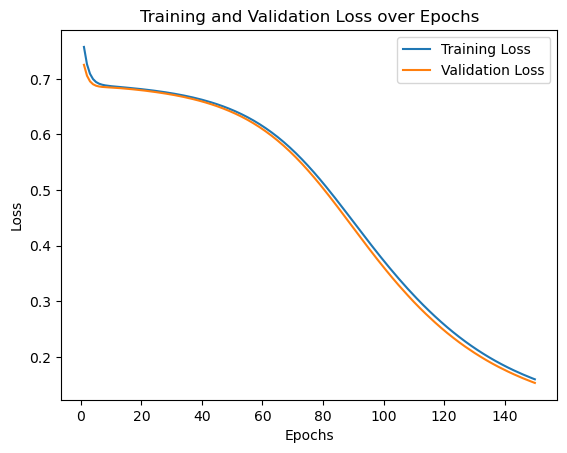

In [187]:
plt.plot(range(1, 151), history.history["loss"], label='Training Loss')
plt.plot(range(1, 151), history.history["val_loss"], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

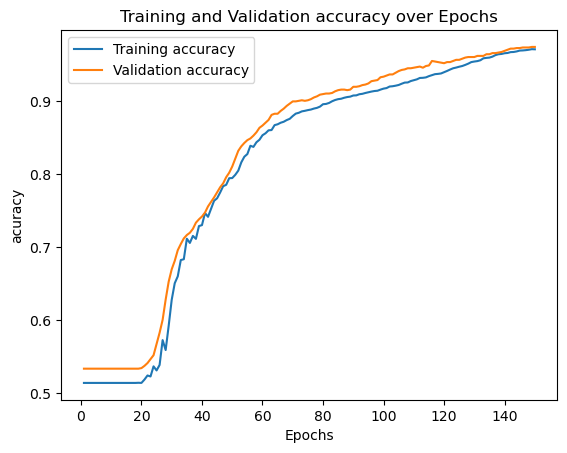

In [188]:
plt.plot(range(1, 151), history.history["accuracy"], label='Training accuracy')
plt.plot(range(1, 151), history.history["val_accuracy"], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acuracy')
plt.title('Training and Validation accuracy over Epochs')
plt.legend()
plt.show()

In [195]:
prob = model.predict(x_train)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [199]:
pred = np.where(prob>0.5,1,0)

In [201]:
accuracy_score(y_train,pred)

0.9136790275426989

In [202]:
f1_score(y_train,pred)

0.9216371001536527

In [211]:
class_report_train = classification_report(y_train,pred)
class_report_train

'              precision    recall  f1-score   support\n\n           0       0.97      0.84      0.90      3131\n           1       0.87      0.98      0.92      3368\n\n    accuracy                           0.91      6499\n   macro avg       0.92      0.91      0.91      6499\nweighted avg       0.92      0.91      0.91      6499\n'

# generalized performance

In [212]:
prob = model.predict(x_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [213]:
pred = np.where(prob>0.5,1,0)

In [214]:
accuracy_score(y_test,pred)

0.9255384615384615

In [216]:
f1_score(y_test,pred)

0.9317540891144952

In [217]:
class_report_test = classification_report(y_test,pred)
class_report_test

'              precision    recall  f1-score   support\n\n           0       0.98      0.86      0.92       785\n           1       0.89      0.98      0.93       840\n\n    accuracy                           0.93      1625\n   macro avg       0.93      0.92      0.92      1625\nweighted avg       0.93      0.93      0.93      1625\n'